In [ ]:
#import librarise
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#svm import 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report 

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

Problem-2)
Prepare a classification model using SVM for salary data

*Data Description:*

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

Solution:

In [ ]:
#loading train data 
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#loading test data
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Basic & EDA

In [ ]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


* All features in both data sets of the same datatype

In [ ]:
salary_train.shape

(30161, 14)

In [ ]:
salary_train.duplicated().value_counts()

False    26903
True      3258
dtype: int64

* There are 3258 duplicate records in dataset

In [ ]:
#duplicated records
salary_train[salary_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
#dropping duplicate records in train data
salary_train_nodup=salary_train.copy()
salary_train_nodup=salary_train.drop_duplicates()
salary_train_nodup

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
salary_train_nodup.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

* There are no null values 

In [ ]:
salary_categorical_features=[feature for feature in salary_train_nodup.columns if salary_train_nodup[feature].dtypes == 'O']
salary_categorical=salary_train_nodup[salary_categorical_features]
salary_categorical.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
for i, column in enumerate(salary_categorical.columns, 1):
  print(salary_categorical[column].value_counts())

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [ ]:
salary_numerical_features=[feature for feature in salary_train_nodup.columns if salary_train_nodup[feature].dtypes != 'O']
salary_discrete_feature=[feature for feature in salary_numerical_features if len(salary_train_nodup[feature].unique())<25 ]
salary_continuous_feature=[feature for feature in salary_numerical_features if feature not in salary_numerical_features]

In [ ]:
salary_numerical=salary_train_nodup[salary_numerical_features]
salary_numerical.head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [ ]:
for i, column in enumerate(salary_numerical.columns, 1):
  print(salary_numerical[column].value_counts())

31    769
36    757
33    748
34    743
37    740
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
9     8268
10    5893
13    4503
14    1558
11    1256
12     994
7      941
6      770
4      541
15     532
5      449
16     364
8      358
3      283
2      149
1       44
Name: educationno, dtype: int64
0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64
0       25485
1902      194
1977      160
1887      153
1848       49
        ...  
2080        1
4356        1
2282        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64
40    11858
50     2504
45     1642
60     1344
35     1138
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hoursperweek, Length: 94, dtype: int64


Visualising Datapoints

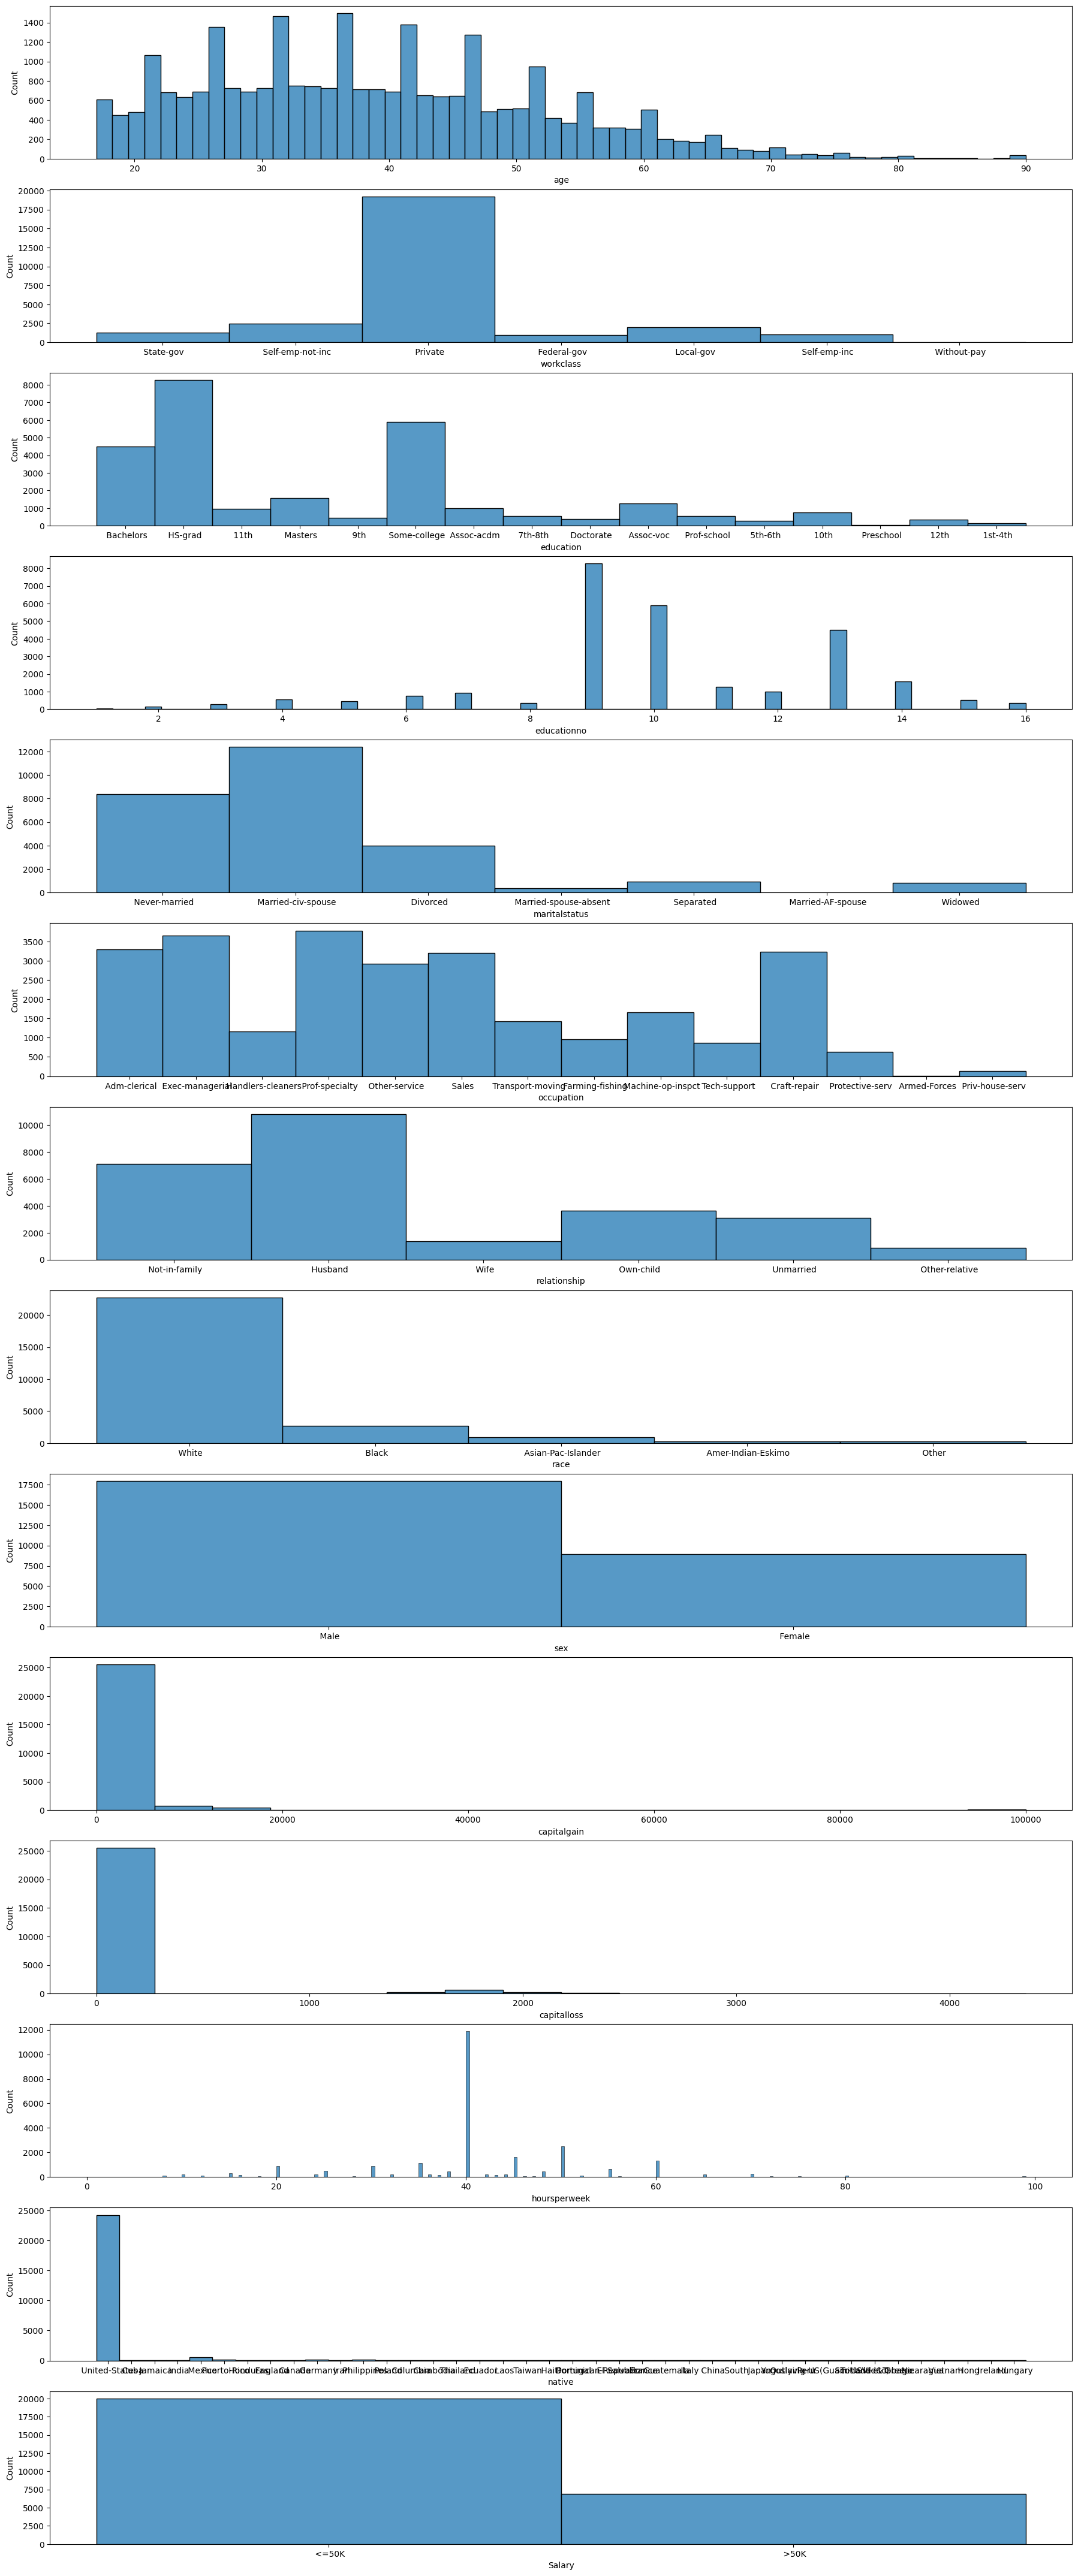

In [ ]:
#plotting histplot to observe datapoints nature
plt.figure(figsize=(22,55))
for i, column in enumerate(salary_train_nodup.columns, 1):
  plt.subplot(14,1,i)
  sns.histplot(salary_train_nodup[column])

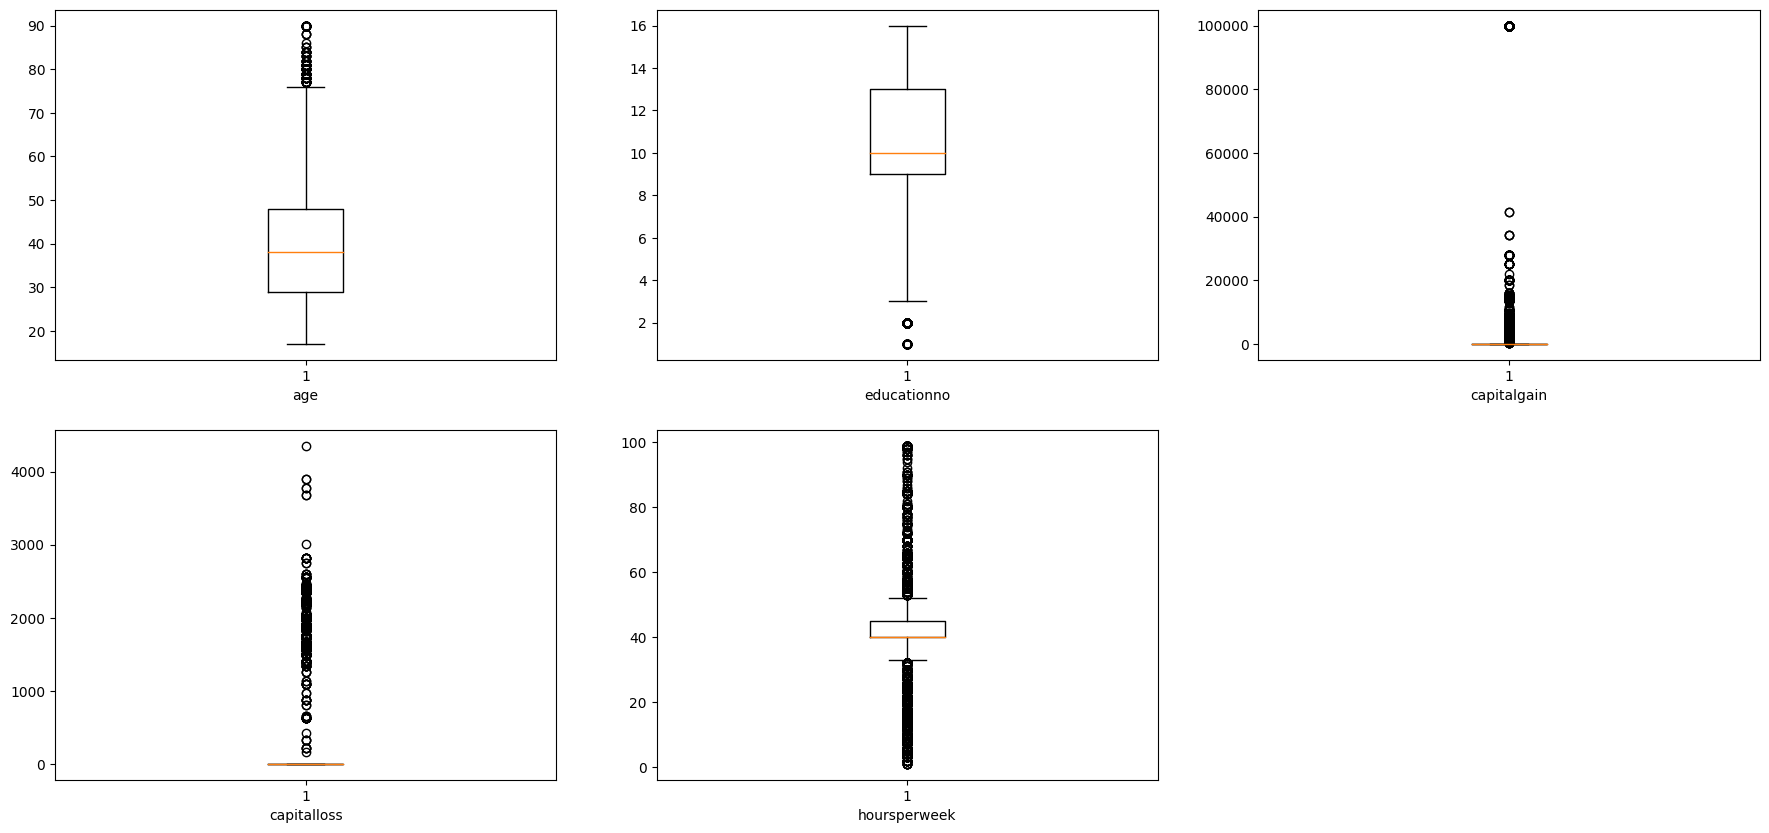

In [ ]:
#plotting boxplot to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(salary_numerical.columns, 1):
  plt.subplot(2,3,i)
  plt.boxplot(salary_numerical[column])
  plt.xlabel(salary_numerical[column].name)

* There are outliers in almost all numerical features.

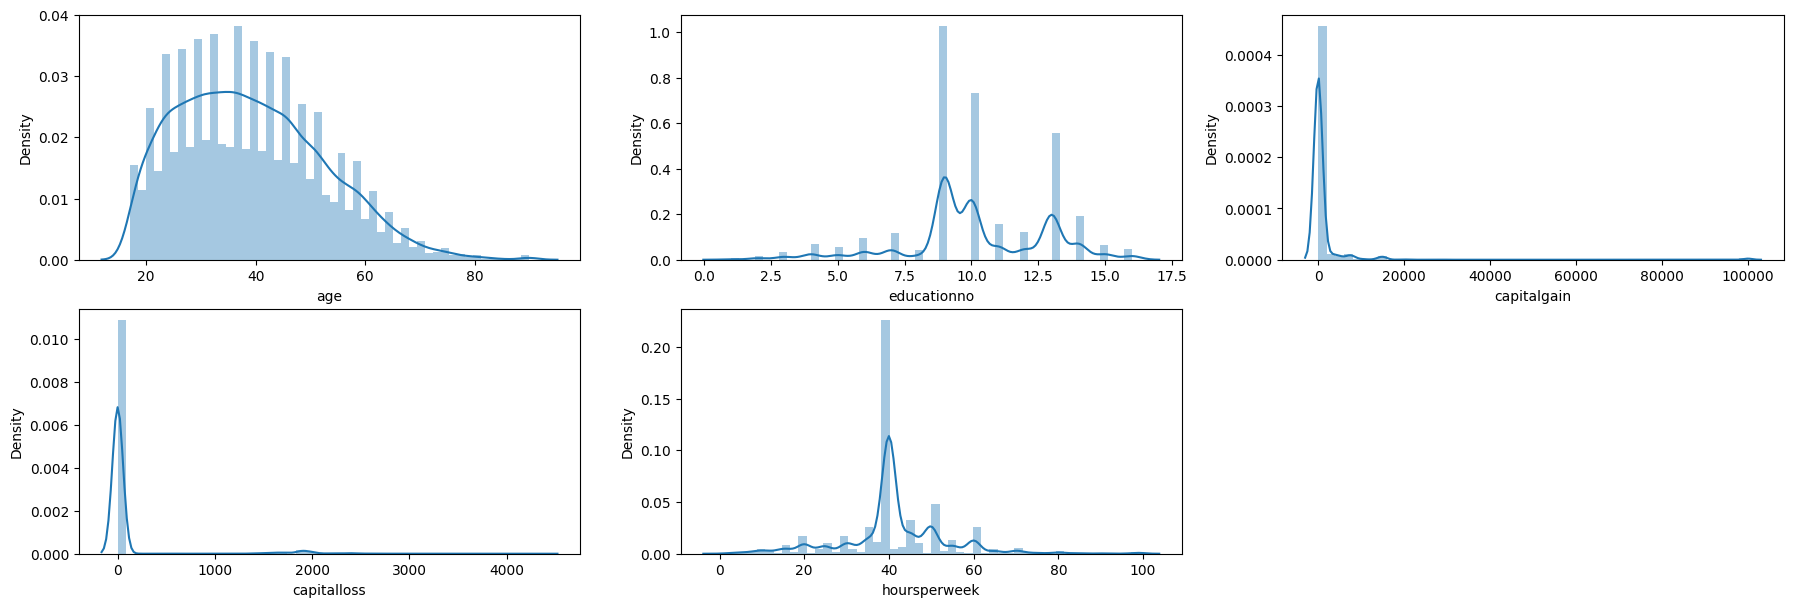

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,7))
for i, column in enumerate(salary_numerical.columns, 1):
    plt.subplot(2,3,i)
    sns.distplot(salary_numerical[column])

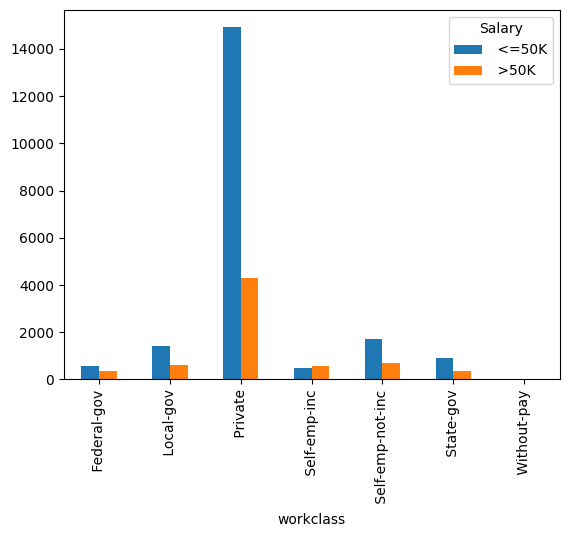

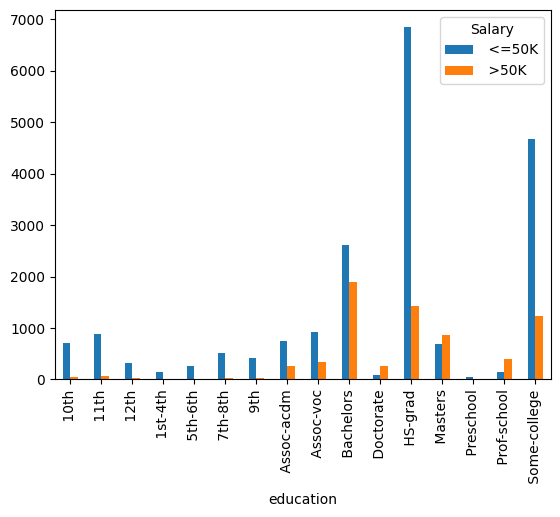

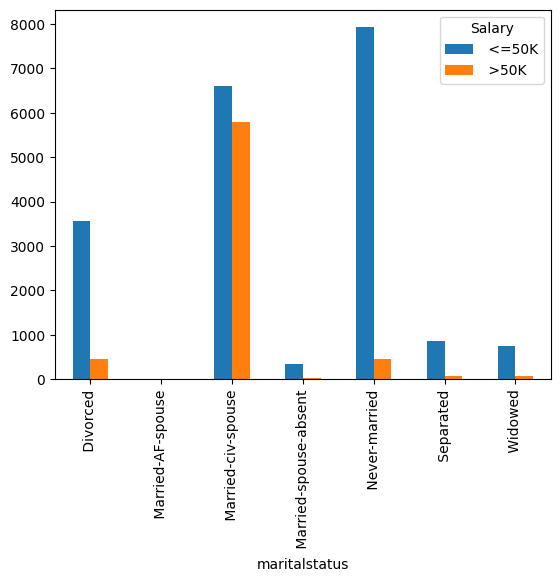

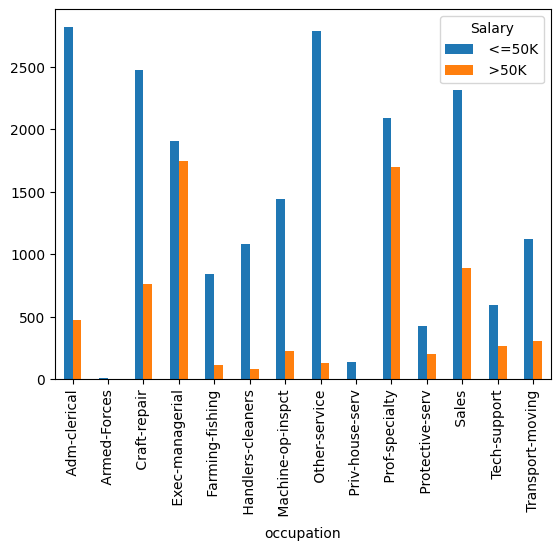

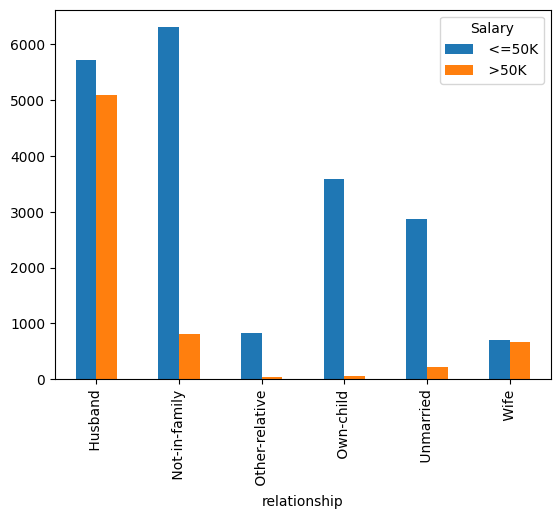

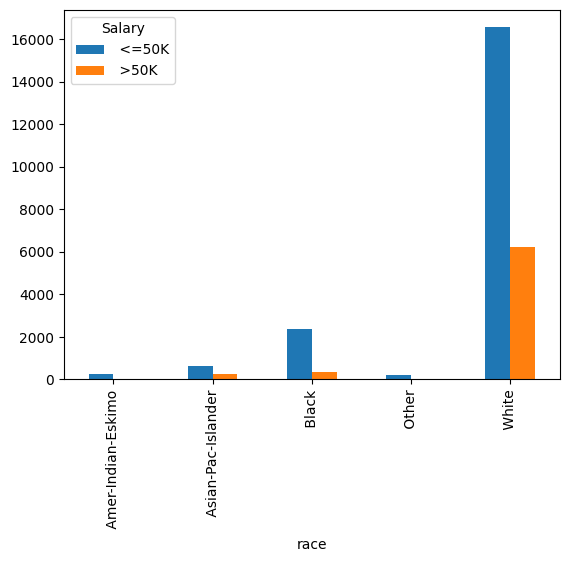

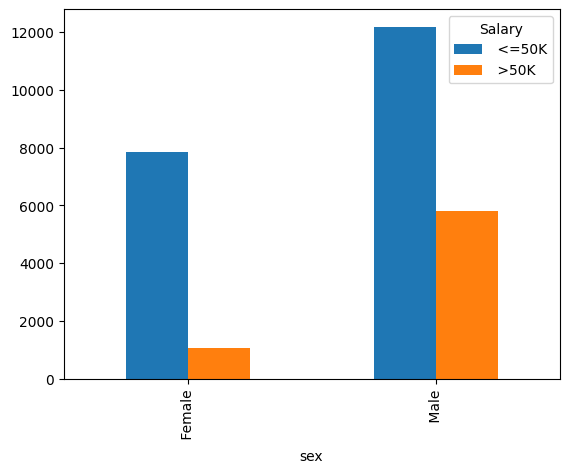

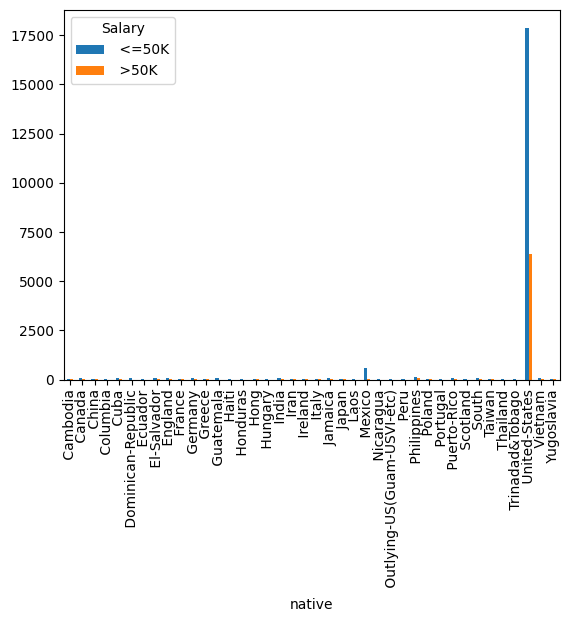

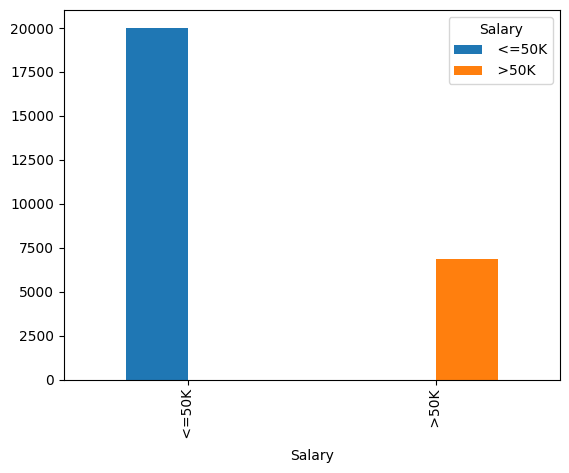

In [ ]:
for i, column in enumerate(salary_categorical.columns, 1):
  pd.crosstab(salary_train_nodup[column],salary_train_nodup.Salary).plot(kind='bar')

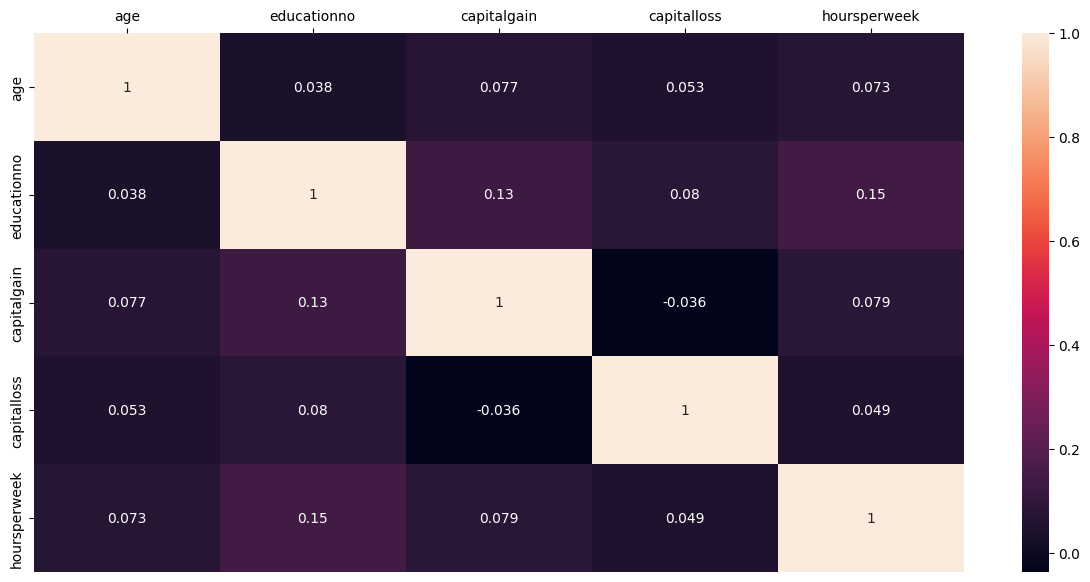

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,7))
ax = sns.heatmap(salary_train_nodup.corr(), annot=True)
ax.xaxis.tick_top()

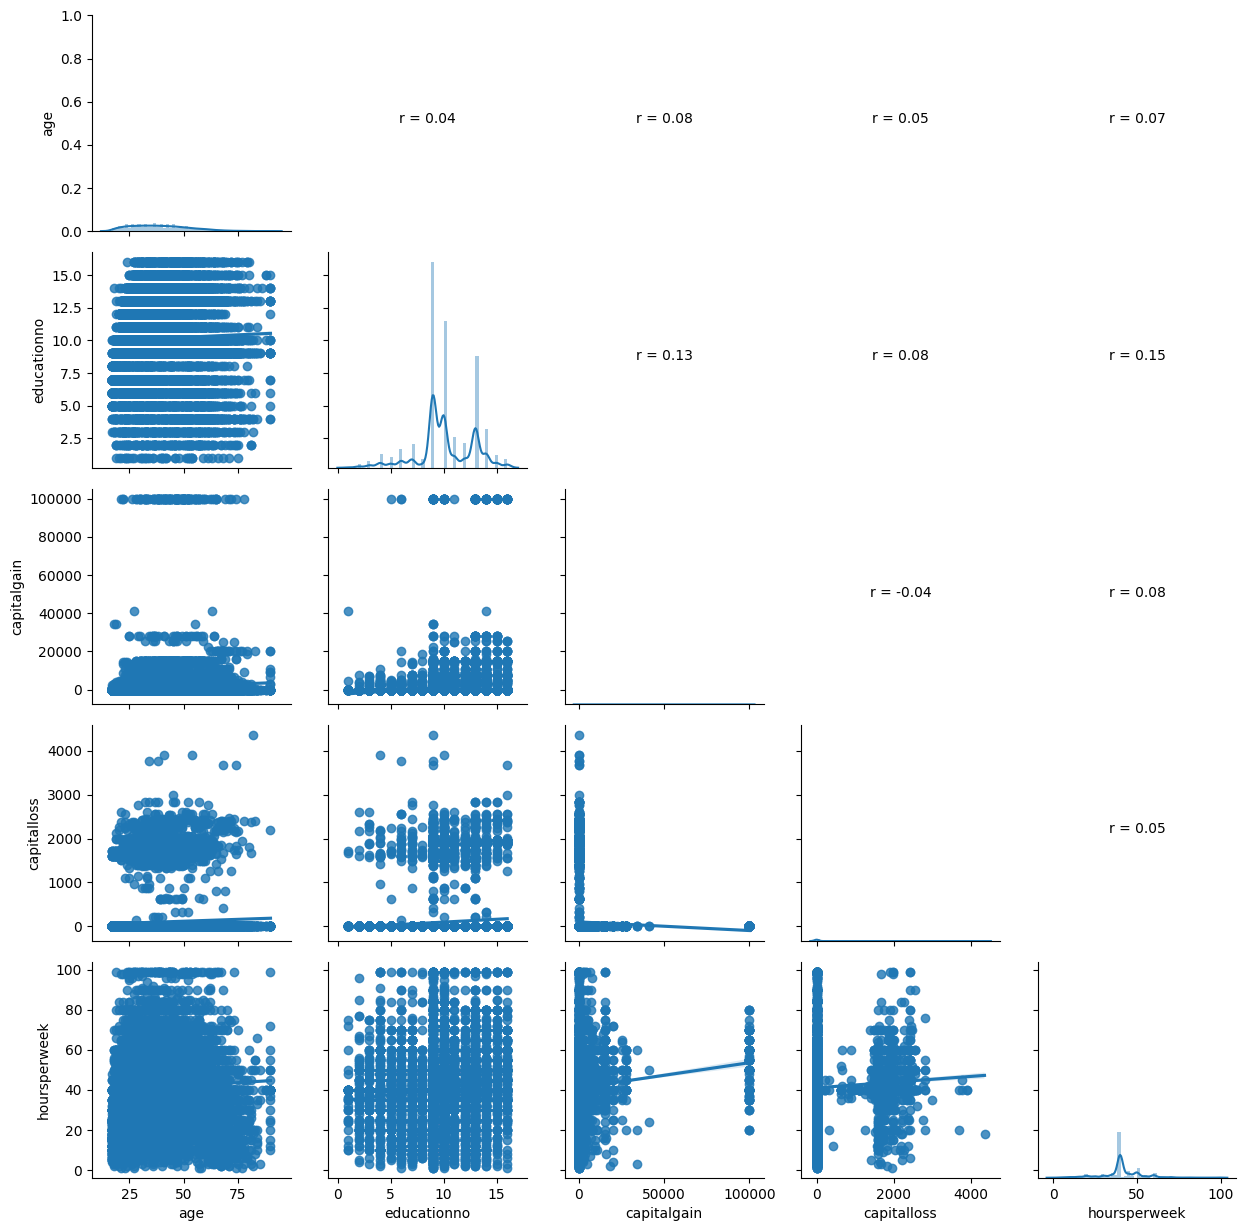

In [ ]:
# creating  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(salary_train_nodup)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

Labeling features

In [ ]:
#labeling features
salary_train_lab=salary_train_nodup.copy()
for i, column in enumerate(salary_train_lab.columns, 1):
  if salary_train_lab[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  salary_train_lab[column]=label_encoder.fit_transform(salary_train_lab[column])
salary_train_lab   

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


Labelled data Visuals

In [ ]:
#labeling features
salary_test_lab=salary_test.copy()
for i, column in enumerate(salary_test_lab.columns, 1):
  if salary_test_lab[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  salary_test_lab[column]=label_encoder.fit_transform(salary_test_lab[column])
  
salary_test_lab

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


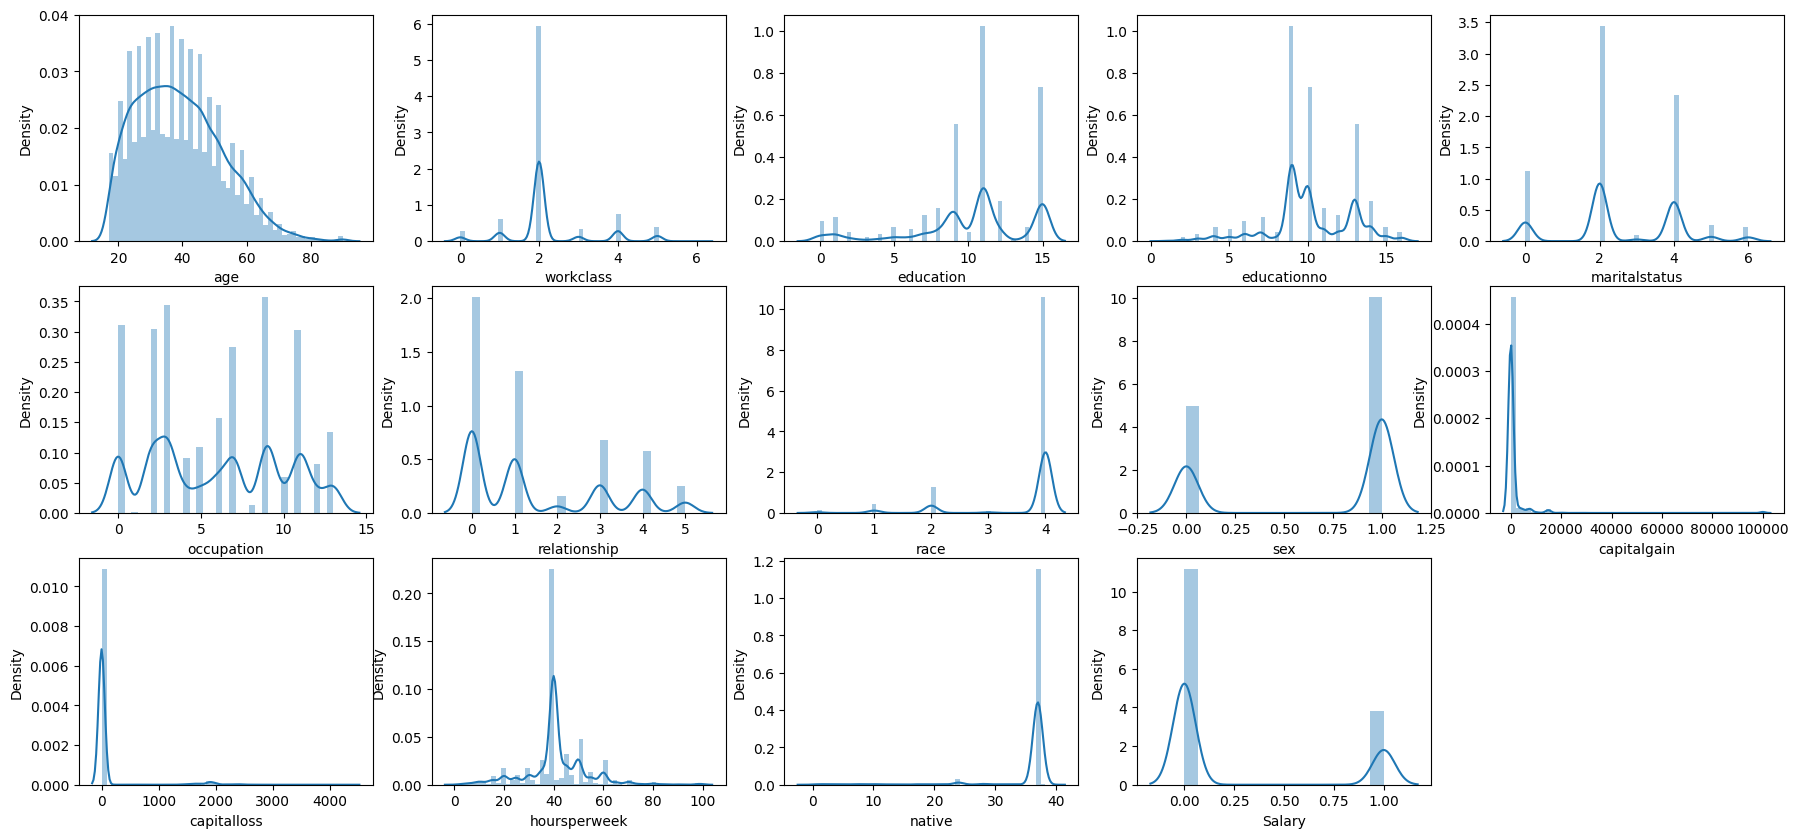

In [ ]:
#plotting distplot to observe datpoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(salary_train_lab.columns, 1):
  plt.subplot(3,5,i)
  sns.distplot(salary_train_lab[column])

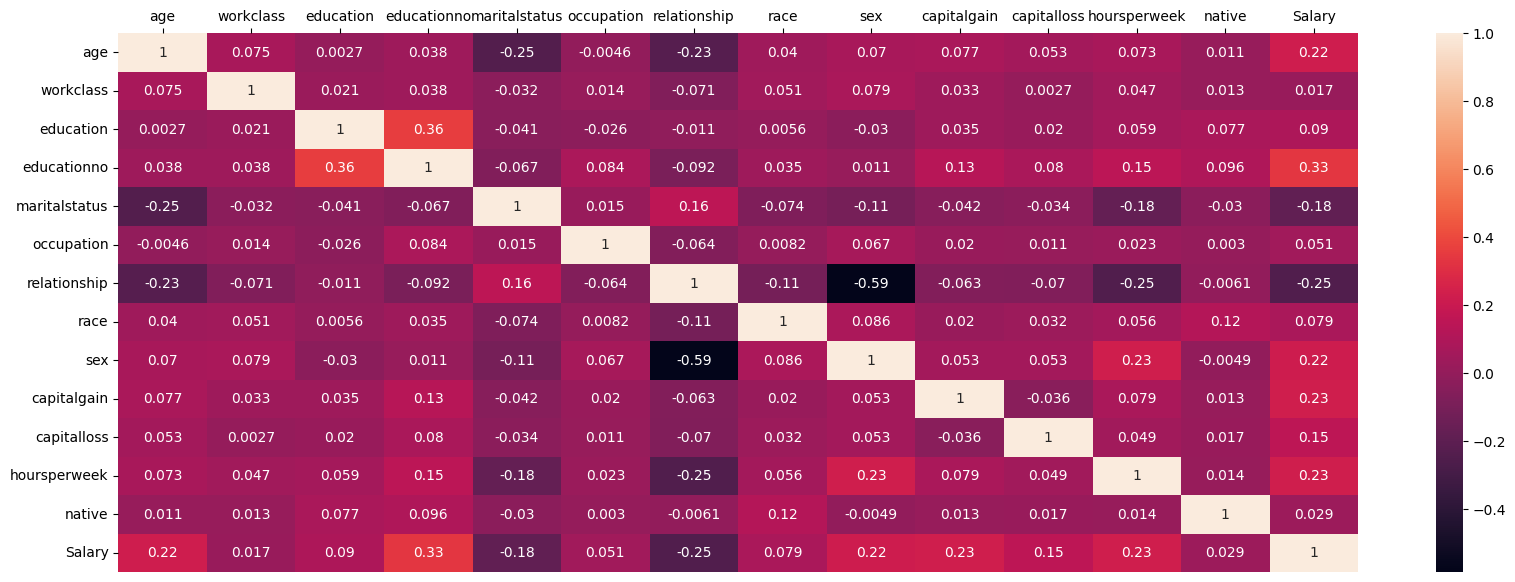

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(salary_train_lab.corr(), annot=True)
ax.xaxis.tick_top()

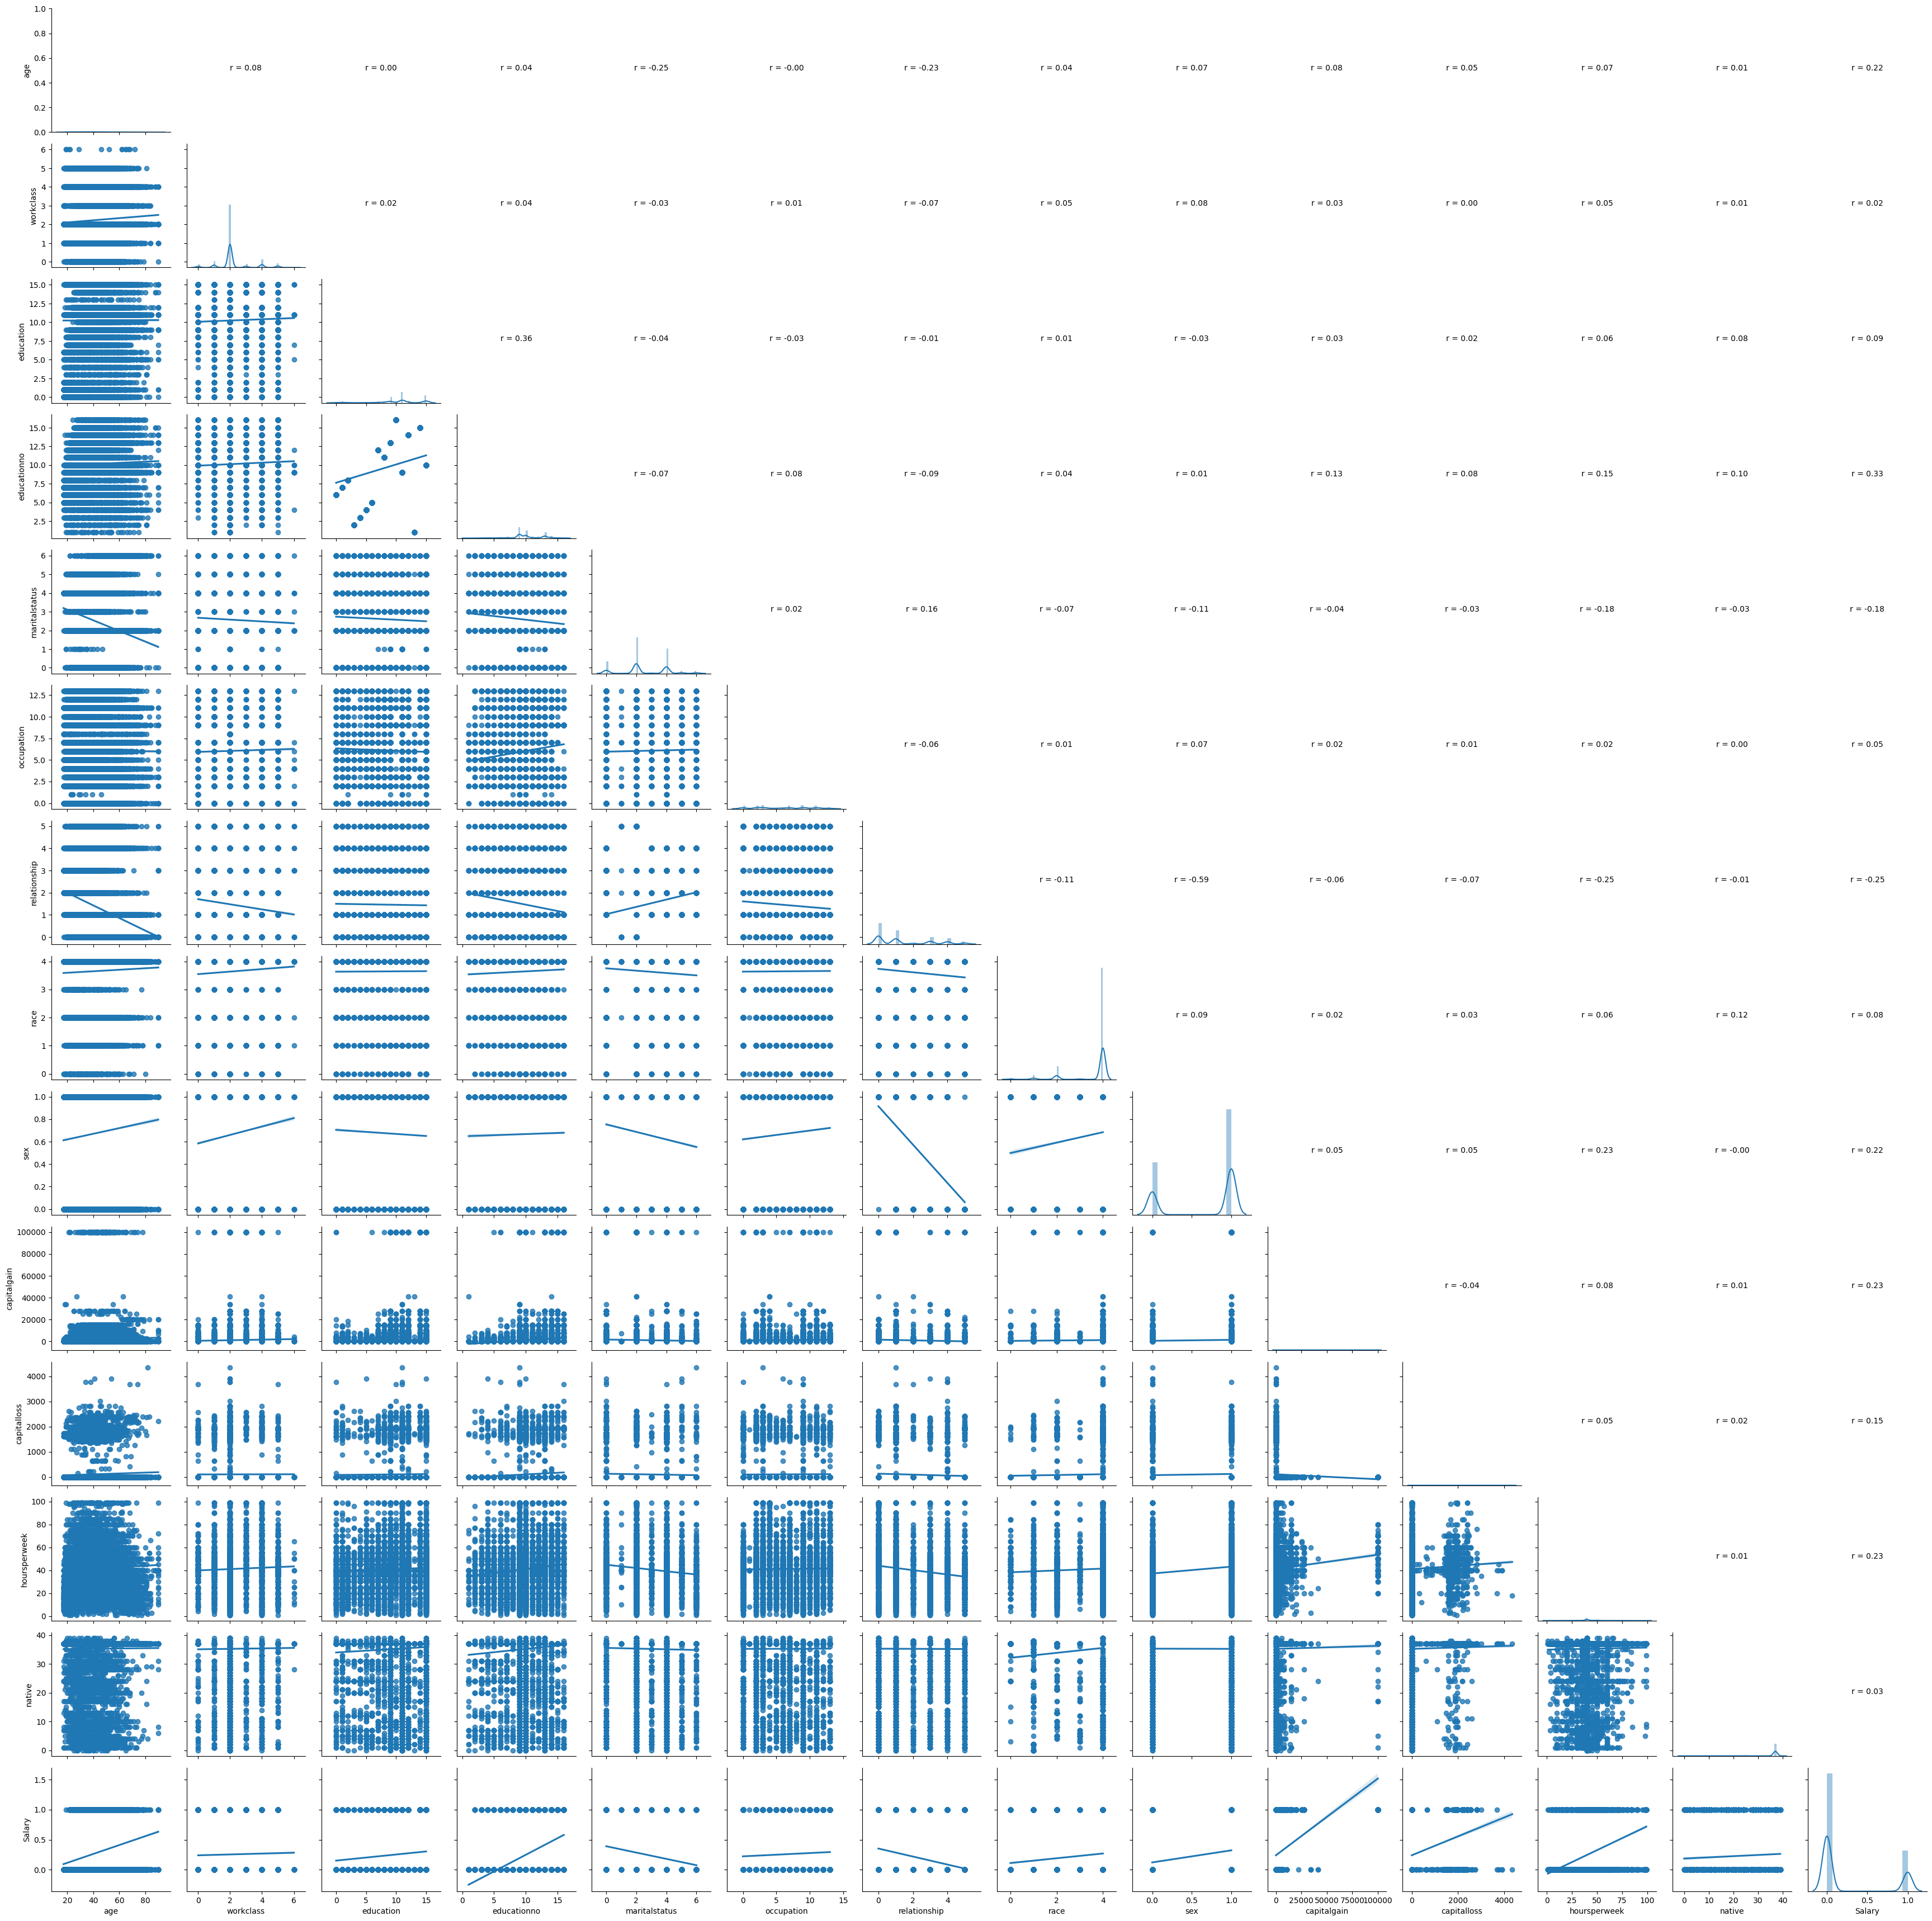

In [ ]:
# create  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(salary_train_lab)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

Standardizing & Data splitting

In [ ]:
std=StandardScaler()


In [ ]:
x_train = salary_train_lab.drop('Salary',axis=1)
y_train = salary_train_lab['Salary']

x_test = salary_test_lab.drop('Salary',axis=1)
y_test = salary_test_lab['Salary']

In [ ]:
x_train_std=std.fit_transform(x_train)
x_train=pd.DataFrame(x_train_std,columns=x_train.columns)
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,2.791383,-0.324519,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.122810,-0.23133,-0.094323,0.282414
1,0.830329,1.788156,-0.324519,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-2.281121,0.282414
2,-0.079549,-0.218299,0.192999,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
3,1.057799,-0.218299,-2.394592,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.155722,-0.23133,-0.094323,0.282414
4,-0.837781,-0.218299,-0.324519,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.155722,-0.23133,-0.094323,-4.979105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1.057799,-0.218299,0.451758,1.471583,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26899,-1.292720,-0.218299,1.228036,-0.055073,0.939836,0.980030,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26900,-0.913604,-0.218299,-0.842037,0.708255,-0.368576,1.476709,2.193341,0.406417,-1.417255,-0.155722,-0.23133,-0.256308,0.282414
26901,1.436914,-0.218299,0.192999,-0.436737,2.248248,-1.503368,1.575572,0.406417,-1.417255,-0.155722,-0.23133,-0.094323,0.282414


In [ ]:
x_test_std=std.fit_transform(x_test)
x_test=pd.DataFrame(x_test_std,columns=x_test.columns)
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


In [ ]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((26903, 13), (26903,), (15060, 13), (15060,))

Support Vector Machines classifier


In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='poly',C=10)
clf.fit(x_train , y_train)
y_train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred) * 100
print("Train data Accuracy =", train_acc)
y_test_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred) * 100
print("Test data Accuracy =", test_acc)

Train data Accuracy = 84.10214474222207
Test data Accuracy = 84.06374501992032



 Test confusion matrix:



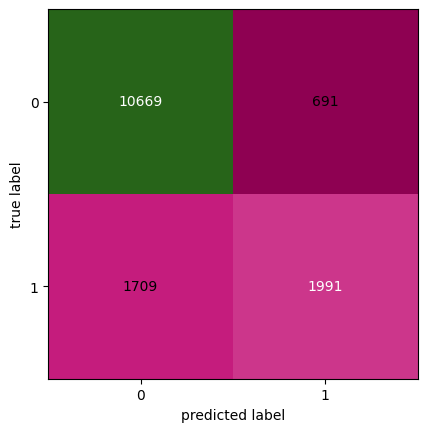

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n Test confusion matrix:\n')
cmt=confusion_matrix(y_test, y_test_pred)
fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
plt.show()

In [ ]:
verify=pd.DataFrame({'actual':y_test,'predict':y_test_pred,'equality':y_test==y_test_pred})
verify

,actual,predict,equality
0,0,0,True
1,0,0,True
2,1,0,False
3,1,1,True
4,0,0,True
...,...,...,...
15055,0,0,True
15056,0,0,True
15057,0,1,False
15058,0,1,False


In [ ]:
verify.equality.value_counts()

True     12660
False     2400
Name: equality, dtype: int64

Conclusion

In [ ]:
print("\n SVM Train  Accuracy =",  np.round(accuracy_score(y_train, y_train_pred),2) * 100,'%')
print("\n SVM Test Accuracy =", np.round(accuracy_score(y_test, y_test_pred),2)* 100,'%')


 SVM Train  Accuracy = 84.0 %

 SVM Test Accuracy = 84.0 %
